# Sample Analytics Project (EDA, SQL and Power BI):

##### Represents a small sample of work experience at Infosys in past as a Senior Systems Engineer in Data Analytics.

&nbsp; 
# Download Dataset from Source (kaggle)

In [14]:
import os

# Get current working directory (where notebook is running)
notebook_path = os.getcwd()
print("Notebook is running from:", notebook_path)

!kaggle datasets download -d vivek468/superstore-dataset-final --unzip -p "{notebook_path}"



Notebook is running from: d:\Data Analytics\EDA Projects
Dataset URL: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final
License(s): other




  0%|          | 0.00/550k [00:00<?, ?B/s]
100%|██████████| 550k/550k [00:00<?, ?B/s]


&nbsp; 
&nbsp; 
&nbsp; 
# Load Data into Data Frame

In [ ]:
import pandas as pd

# Construct full path to the CSV file
csv_file = os.path.join(notebook_path, "Sample - Superstore.csv")

# Load into DataFrame
df = pd.read_csv(csv_file, encoding='ISO-8859-1')   #   or    encoding = 'windows-1252'
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


&nbsp; 
&nbsp; 
&nbsp;
# Explore, Clean and Analyze Dataset:
&nbsp;
&nbsp;

### Explore: Info, Description (Statistical Summary)

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the dataset & looks like 
print("Dataset Info:")
df.info()

# Statistical summary of the dataset
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Cat

,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit,Month,Revenue
count,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,55190.379428,229.858001,3.789574,0.156203,28.656896,7.809686,197.580421
min,1.000000,2014-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.000000,0.088800
25%,2499.250000,2015-05-23 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,5.000000,14.336000
50%,4997.500000,2016-06-26 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,9.000000,45.923200
75%,7495.750000,2017-05-14 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,11.000000,180.176475
max,9994.000000,2017-12-30 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,12.000000,17499.950000
std,2885.163629,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,3.284654,539.045278


### Explore: Unique values in the dataset

In [57]:
# Unique values in the dataset
print("\nUnique Values:")
df.nunique()


Unique Values:


Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
Month              12
Revenue          6289
dtype: int64

### Explore: Structure, Missing Values

In [63]:
# Check structure 
print("Dataframe Shape:",df.shape) 
print("Dataframe Columns:",df.columns) 
df.head() 

# Missing values 
print("\n\nMissing Values:\n",df.isnull().sum()) 



Dataframe Shape: (9994, 23)
Dataframe Columns: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Month',
       'Revenue'],
      dtype='object')


Missing Values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Month            0
Revenue          0
dtype: int64


### Clean data frame

In [78]:
# Convert dates 
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce') 

# Create new columns 
df['Month'] = df['Order Date'].dt.month 
df['Revenue'] = df['Sales'] * (1 - df['Discount']) 

# Grouped analysis 
print("\nRegional Sales:",df.groupby('Region')['Sales'].sum()) 
print("\nCategorical Profit:",df.groupby('Category')['Profit'].sum()) 
print("\nMonthly Sales:",df.groupby('Month')['Sales'].sum()) 

# Copy and Rename the Columns to be used further in SQL and Power bi
df['Product_Name'] = df['Product Name'].str.strip().str.title()



Regional Sales: Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

Categorical Profit: Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

Monthly Sales: Month
1      94924.8356
2      59751.2514
3     205005.4888
4     137762.1286
5     155028.8117
6     152718.6793
7     147238.0970
8     159044.0630
9     307649.9457
10    200322.9847
11    352461.0710
12    325293.5035
Name: Sales, dtype: float64


# Visualization 

### Regional Sales:

<Axes: xlabel='Region', ylabel='Sales'>

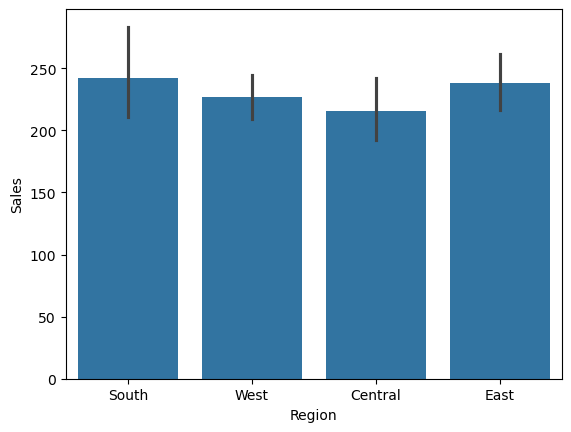

In [79]:
# # Sales by Region 
sns.barplot(x='Region', y='Sales', data=df) 


### Monthly Sales Trend:

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

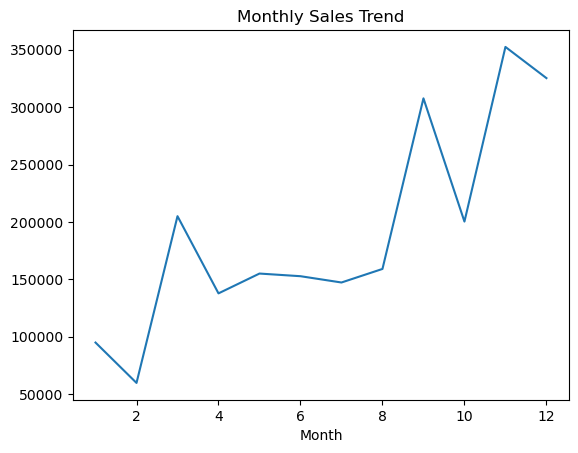

In [80]:
# Monthly Sales Trend 
monthly_sales = df.groupby('Month')['Sales'].sum() 
monthly_sales.plot(kind='line', title='Monthly Sales Trend') 



### Profit vs Discount 

<Axes: xlabel='Discount', ylabel='Profit'>

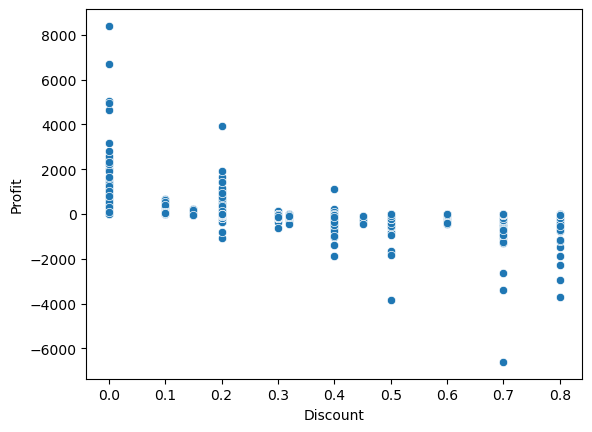

In [81]:
# Profit vs Discount 
sns.scatterplot(x='Discount', y='Profit', data=df) 



### Top 10 Products by Sales:

<Axes: title={'center': 'Top 10 Products by Sales'}, ylabel='Product Name'>

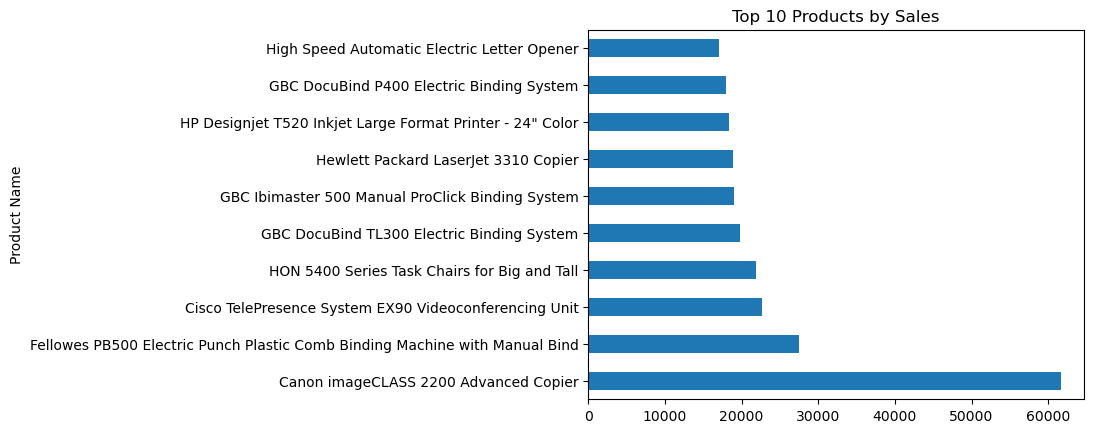

In [82]:
# Top 10 Products by Sales 
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10) 
top_products.plot(kind='barh', title='Top 10 Products by Sales')

# Save Cleaned Data to CSV, Upload CSV to Google CLoud (BIGQuery): 

#### New file made to send cleaned data to BIGQuery for further analysis and data accessibility to Power BI

In [83]:
# Save cleaned version
df.to_csv('superstore_cleaned.csv', index=False)


### Authenticate Google Cloud (BIGQuery) key:

In [84]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"D:\Data Analytics\EDA Projects\st-proj-retail-eda-sql-pow-bi-1022115cf4e9.json"


### Upload CSV to BigQuery:

##### Python code automates the uploading of CSV file to Google Cloud (BIGQuery)

In [85]:
from google.cloud import bigquery

# Initialize BigQuery client
client = bigquery.Client(project="st-proj-retail-eda-sql-pow-bi")  # Replace with your project ID

# Define dataset and table
dataset_id = "retail_data"
table_id = "sales"
table_ref = f"{client.project}.{dataset_id}.{table_id}"

# Configure job
job_config = bigquery.LoadJobConfig(
    source_format=bigquery.SourceFormat.CSV,
    skip_leading_rows=1,
    autodetect=True,
)

# Load data from local CSV
with open("superstore_cleaned.csv", "rb") as file:
    load_job = client.load_table_from_file(
        file,
        table_ref,
        job_config=job_config
    )

# Wait for job to complete
load_job.result()
print(f"Table {table_id} uploaded to dataset {dataset_id} in project {client.project}")


Table sales uploaded to dataset retail_data in project st-proj-retail-eda-sql-pow-bi
